In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Importing the dataset
df = pd.read_csv('/content/gdrive/My Drive/twitter.csv', encoding='latin-1')

# Data Analysis

In [6]:
#First 5 records
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
#Giving names to columns
names = ['target','id', 'date', 'query', 'user', 'tweet']
df.columns = names

In [8]:
#Datatypes of every column
df.dtypes

target     int64
id         int64
date      object
query     object
user      object
tweet     object
dtype: object

In [9]:
#Total rows and columns
df.shape

(1599999, 6)

In [5]:
#Changing the format of date column
df['date'] = pd.to_datetime(df.date)
df['date'] = df['date'].dt.strftime('%m/%d/%Y')

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [11]:
#Details of dataset
df.describe()

,target,id
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [6]:
#Dropping the query column
df = df.drop(columns=['query'])
df.tail()

,target,id,date,user,tweet
1599994,4,2193601966,06/16/2009,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,06/16/2009,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,06/16/2009,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,06/16/2009,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599998,4,2193602129,06/16/2009,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [13]:
#Checking for null values
df.isnull().sum()

target    0
id        0
date      0
user      0
tweet     0
dtype: int64

In [14]:
#Check for duplicated values
df.duplicated().value_counts()

False    1599999
Name: count, dtype: int64

In [15]:
#Unique values oof target column
df["target"].unique()

array([0, 4])

In [16]:
#Counting the values of target column
df["target"].value_counts()

target
4    800000
0    799999
Name: count, dtype: int64

In [58]:
#Display the users who have positive tweets
users = df[["user","tweet"]][df.target==4]
users

,user,tweet
799999,ersle,I LOVE @Health4UandPets u guys r the best!!
800000,becca210,im meeting up with one of my besties tonight! ...
800001,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,katarinka,Being sick can be really cheap when it hurts t...
800003,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone
...,...,...
1599994,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [18]:
#Total rows and columns of users
users.shape

(800000, 3)

# Data Pre-processing

In [7]:
#Remove unwanted text patterns
def remove_pattern(input, pattern):
    r = re.findall(pattern, input)
    for i in r:
        input = re.sub(i," ",input)
    return input

In [8]:
#Removing twitter handles
df['new tweet'] = np.vectorize(remove_pattern)(df["tweet"], "@[\w]*")
df.head()

,target,id,date,user,tweet,new tweet
0,0,1467810672,04/06/2009,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,1467810917,04/06/2009,mattycus,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to ...
2,0,1467811184,04/06/2009,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,1467811193,04/06/2009,Karoli,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why a..."
4,0,1467811372,04/06/2009,joy_wolf,@Kwesidei not the whole crew,not the whole crew


In [9]:
#Making new tweet column in lowercase
df["new tweet"] = df["new tweet"].str.lower()

In [10]:
#Removing punctuations and special characters
df["new tweet"] = df["new tweet"].str.replace("[^a-zA-Z#]", " ")
df.loc[90:100,"tweet":"new tweet"]

,tweet,new tweet
90,wednesday my b-day! don't know what 2 do!!,wednesday my b-day! don't know what 2 do!!
91,Poor cameron (the hills),poor cameron (the hills)
92,"pray for me please, the ex is threatening to s...","pray for me please, the ex is threatening to s..."
93,"@makeherfamous hmm , do u really enjoy being ...","hmm , do u really enjoy being with him ? if..."
94,Strider is a sick little puppy http://apps.fa...,strider is a sick little puppy http://apps.fa...
95,"so rylee,grace...wana go steve's party or not?...","so rylee,grace...wana go steve's party or not?..."
96,"hey, I actually won one of my bracket pools! T...","hey, i actually won one of my bracket pools! t..."
97,"@stark YOU don't follow me, either and i work...","you don't follow me, either and i work for ..."
98,A bad nite for the favorite teams: Astros and ...,a bad nite for the favorite teams: astros and ...
99,Body Of Missing Northern Calif. Girl Found: P...,body of missing northern calif. girl found: p...


In [11]:
#Removing URLs
df['new tweet'] = df['new tweet'].apply(lambda x: re.sub('((www\.[^s]+)|(https?://[^s]+))', ' ',x))
df.iloc[280:288, 4:6]

,tweet,new tweet
280,sooo sick of the snow ughh,sooo sick of the snow ughh
281,@ITS_NEMESIS -------,-------
282,@LoveMeagan it doesn't work your fan is upset,it doesn't work your fan is upset
283,I would like to apologize for the repeated Vid...,i would like to apologize for the repeated vid...
284,@zaydia but i cant figure out how to get there...,but i cant figure out how to get there / bac...
285,"FML: So much for seniority, bc of technologica...","fml: so much for seniority, bc of technologica..."
286,feels like she slept the day away. Not look...,feels like she slept the day away. not look...
287,@ThaStevieG but what I really want is my old b...,but what i really want is my old bass back


In [12]:
#Removing numeric numbers
df['new tweet'] = df['new tweet'].apply(lambda x:re.sub('[0-9]+','',x))
df['new tweet'].tail()

1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy th birthday to my boo of alll time!!! tu...
1599998                         happy #charitytuesday       
Name: new tweet, dtype: object

In [25]:
#Tokenization
tokenized_tweet = df['new tweet'].apply(lambda x:x.split())
tokenized_tweet

0          [is, upset, that, he, can't, update, his, face...
1          [i, dived, many, times, for, the, ball., manag...
2          [my, whole, body, feels, itchy, and, like, its...
3          [no,, it's, not, behaving, at, all., i'm, mad....
4                                    [not, the, whole, crew]
                                 ...                        
1599994    [just, woke, up., having, no, school, is, the,...
1599995    [thewdb.com, -, very, cool, to, hear, old, wal...
1599996    [are, you, ready, for, your, mojo, makeover?, ...
1599997    [happy, th, birthday, to, my, boo, of, alll, t...
1599998                             [happy, #charitytuesday]
Name: new tweet, Length: 1599999, dtype: object

In [26]:
#Stemming
from nltk import PorterStemmer
p = PorterStemmer()
tokenized_tweet = df["new tweet"].apply(lambda x: [p.stem(i) for i in x])
tokenized_tweet.head()

0    [i, s,  , u, p, s, e, t,  , t, h, a, t,  , h, ...
1    [ ,  , i,  , d, i, v, e, d,  , m, a, n, y,  , ...
2    [m, y,  , w, h, o, l, e,  , b, o, d, y,  , f, ...
3    [ ,  , n, o, ,,  , i, t, ', s,  , n, o, t,  , ...
4    [ ,  , n, o, t,  , t, h, e,  , w, h, o, l, e, ...
Name: new tweet, dtype: object

# Data Visualization

<ipython-input-29-c237eb28c3b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='hls')


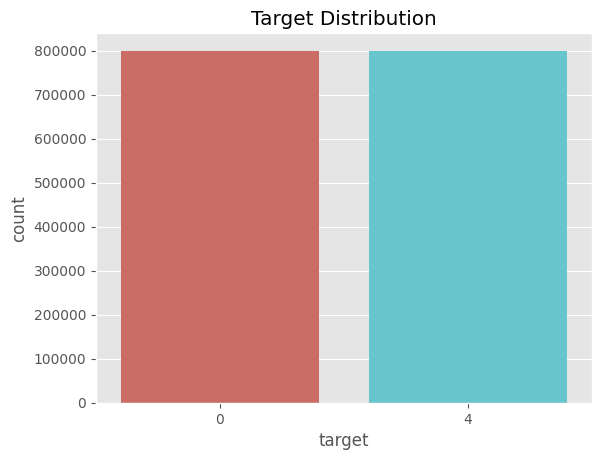

In [29]:
%matplotlib inline
plt.style.use('ggplot')
sns.countplot(x='target', data=df, palette='hls')
plt.title('Target Distribution')
plt.show()

In [13]:
#Plotting all words
words = ' '.join([text for text in df['new tweet']])

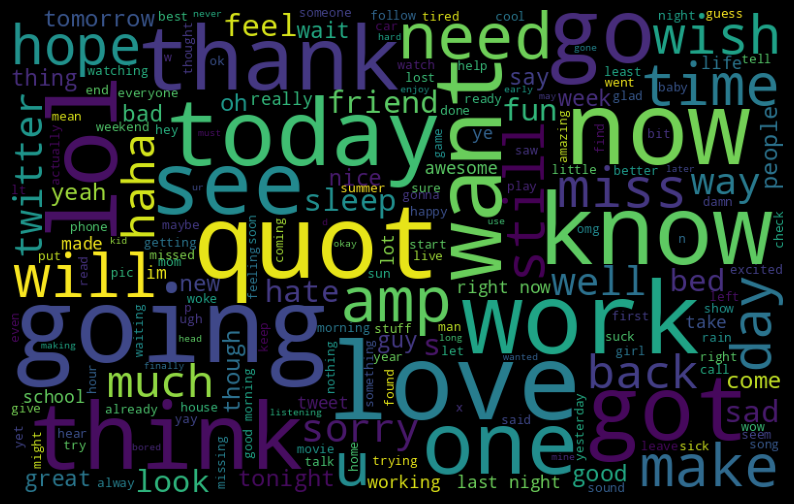

In [14]:
plt.style.use('dark_background')
from wordcloud import WordCloud
wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wc)
plt.axis('off')
plt.show()

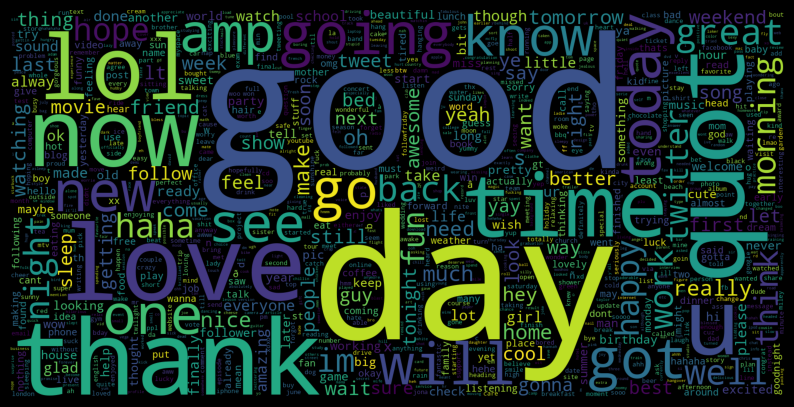

In [15]:
#Plotting positive words only
plt.style.use('dark_background')
positive = df['new tweet'][df['target']==4]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(positive))
plt.figure(figsize = (10,7))
plt.imshow(wc)
plt.axis('off')
plt.show()

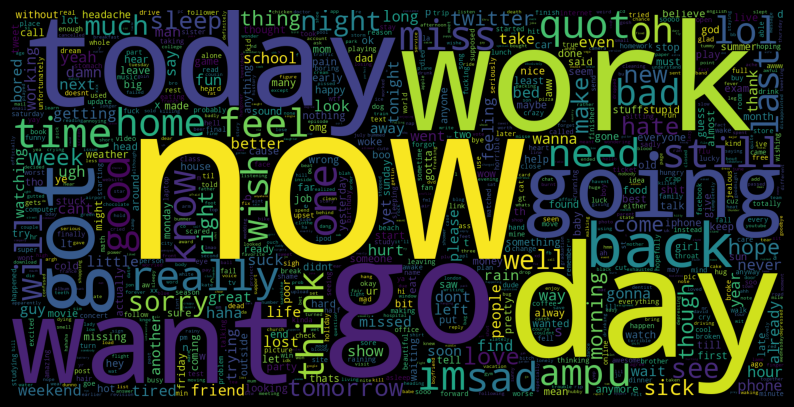

In [16]:
#Plotting negative words only
plt.style.use('dark_background')
negative = df['new tweet'][df['target']==0]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative))
plt.figure(figsize = (10,7))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [24]:
#Collecting Hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [25]:
#Extracting positive hashtags
HT_positive = hashtag_extract(df['new tweet'][df['target'] == 4])
HT_positive = sum(HT_positive,[])
HT_positive[:10]

['devunity',
 'alexa',
 'japan',
 'skype',
 'expletives',
 'chuck',
 'nightcard',
 'paragon',
 'dogs',
 'baumarkt']

<ipython-input-26-0a14fbfaf636>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=d, x= "Hashtag", y = "Count",palette="husl")


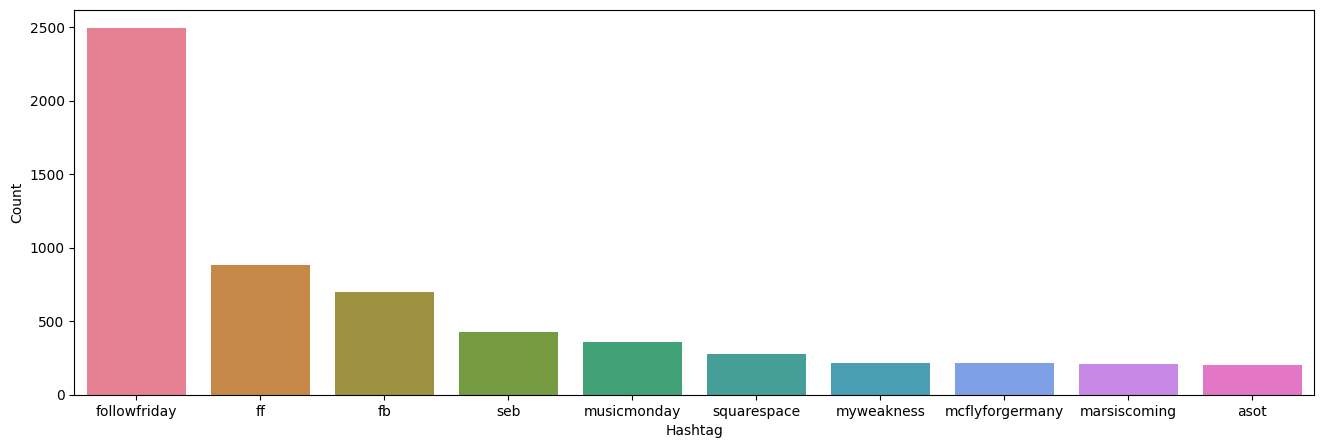

In [26]:
plt.style.use("default")
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})

#Top 10 most frequent positive hashtags
d = d.nlargest(columns="Count", n = 10)

plt.figure(figsize=(16,5))
sns.barplot(data=d, x= "Hashtag", y = "Count",palette="husl")
plt.show()

In [25]:
#Extracting negative hashtags
HT_negative = hashtag_extract(df['new tweet'][df['target'] == 0])
HT_negative = sum(HT_negative,[])
HT_negative[:10]

['itm',
 'therapyfail',
 'fb',
 'ttsc',
 'gayforpeavy',
 'fml',
 'camerafail',
 'fb',
 'travian',
 'wow']

<ipython-input-26-d8f20adcd15d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=y, y= "Hashtag", x = "Count",palette="Set2",orient="h")


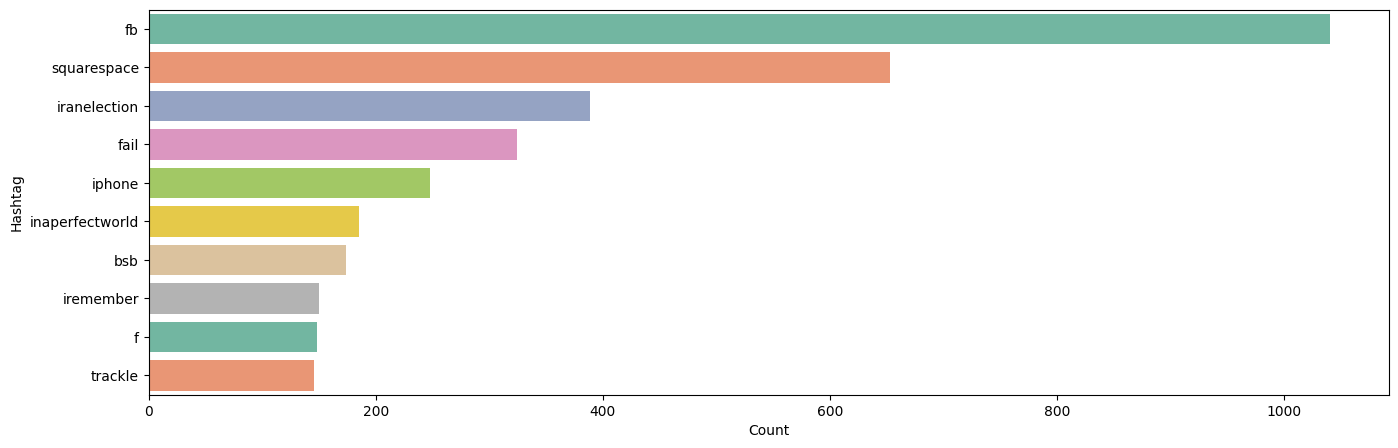

In [26]:
b = nltk.FreqDist(HT_negative)
y = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

#Ttop 10 most frequent negative hashtags
y = y.nlargest(columns="Count", n = 10)

plt.figure(figsize=(16,5))
sns.barplot(data=y, y= "Hashtag", x = "Count",palette="Set2",orient="h")
plt.show()

# Feature Extraction

In [15]:
x=df["new tweet"] #Independent variable
y=df["target"] #Dependent variable

In [16]:
#Splitting Training and Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=12312)

In [17]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (1439999,)
x_test shape: (160000,)
y_train shape: (1439999,)
y_test shape: (160000,)


In [18]:
#TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', ngram_range=(1,1))
tf.fit(x_train)

TfidfVectorizer(max_features=1000)

In [19]:
#Transform data
x_train = tf.transform(x_train)
x_test  = tf.transform(x_test)

# Model Building

In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

l = LogisticRegression()
l.fit(x_train,y_train)

LogisticRegression()

In [21]:
#Predict values
y_pred = l.predict(x_test)
y_pred

array([4, 0, 4, ..., 4, 4, 0])

In [22]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[59897 19990]
 [17574 62539]]


The result says we have '59897+62539' correct predictions and '19990+17574' incorrect predictions

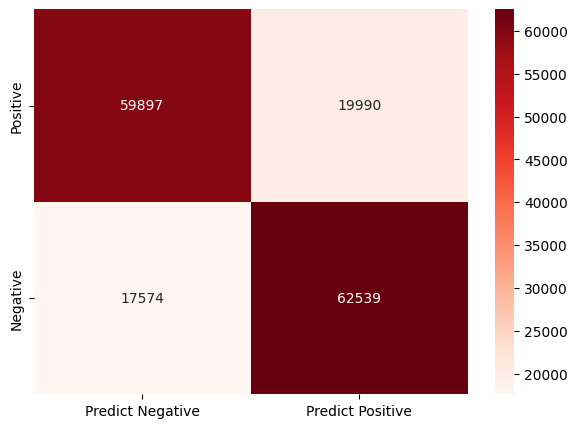

In [27]:
cm = confusion_matrix(y_test,y_pred,labels=[0,4])
df_cm = pd.DataFrame(cm, index = [i for i in ["Positive","Negative"]],
                  columns = [i for i in ["Predict Negative","Predict Positive"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap="Reds",fmt="d")
plt.show()

In [28]:
#Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.765225


In [29]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     79887
           4       0.76      0.78      0.77     80113

    accuracy                           0.77    160000
   macro avg       0.77      0.77      0.77    160000
weighted avg       0.77      0.77      0.77    160000



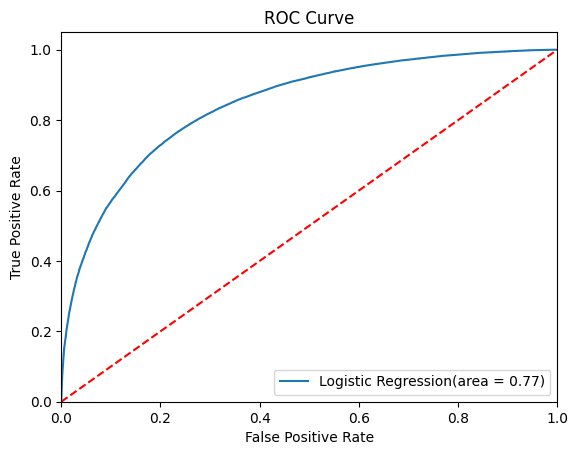

In [26]:
#Receiver Operating Characteristic(ROC) curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_test_binary = (y_test == 4).astype(int)
logit_roc_auc = roc_auc_score(y_test_binary,y_pred)
fpr,tpr,thresholds = roc_curve(y_test_binary,l.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="Logistic Regression(area = %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

ROC curve : It gives the comparision between true positive and false positive rate

A 'good classifier' stays as far away from that line as possible,i.e.,towards the top-left corner.


In [30]:
#Support Vector Classifier
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(x_train,y_train)

LinearSVC()

In [32]:
y_pred = svc.predict(x_test)
y_pred

array([4, 0, 4, ..., 4, 4, 0])

In [33]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[59523 20364]
 [17363 62750]]


The result says we have '59523+62750' correct predictions and '20364+17363' incorrect predictions

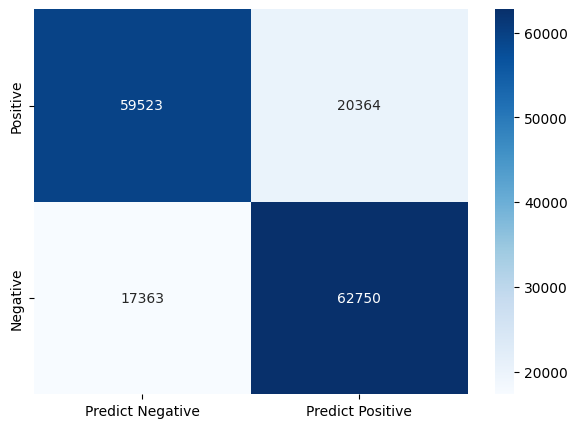

In [52]:
cm = confusion_matrix(y_test,y_pred,labels=[0,4])
df_cm = pd.DataFrame(cm, index = [i for i in ["Positive","Negative"]],
                  columns = [i for i in ["Predict Negative","Predict Positive"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,cmap="Blues",fmt="d")
plt.show()

In [53]:
#Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.76420625


In [54]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76     79887
           4       0.75      0.78      0.77     80113

    accuracy                           0.76    160000
   macro avg       0.76      0.76      0.76    160000
weighted avg       0.76      0.76      0.76    160000



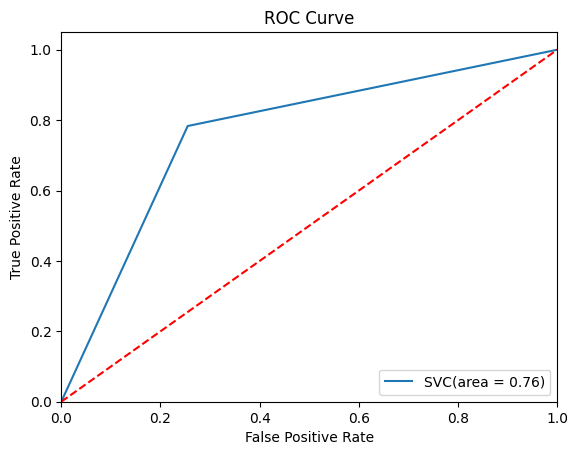

In [34]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_test_binary = (y_test == 4).astype(int)
svm_roc_auc = roc_auc_score(y_test_binary,y_pred)
fpr,tpr,thresholds = roc_curve(y_test_binary,y_pred)
plt.figure()
plt.plot(fpr,tpr,label="SVC(area = %0.2f)" % svm_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.savefig("SVC_ROC")
plt.show()

As the accuracy of Logistic Regression model(0.7652) is more than Linear SVC model(0.7642),

the Logistic Regression model is better to use in this case.